In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 分析google play store資料

In [175]:
df = pd.read_csv('C:/Users/ACER/aiwork/googleplaystore.csv', encoding = 'utf-8')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [176]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

刪除不會用到的欄位

In [177]:
df.drop(['Last Updated', 'Current Ver', 'Android Ver', 'Size', 'Type', 'Content Rating', 'Genres'], axis = 1, inplace = True)

In [155]:
len(df['Category'].unique())
# 總共有34種分類

34

看哪一種分類最多

In [232]:
category = df.groupby("Category").count()
category.drop('1.9', inplace = True)
category.head()

,App,Rating,Reviews,Installs,Price
Category,,,,,
ART_AND_DESIGN,65,62,65,65,65
AUTO_AND_VEHICLES,85,73,85,85,85
BEAUTY,53,42,53,53,53
BOOKS_AND_REFERENCE,231,178,231,231,231
BUSINESS,460,303,460,460,460


In [234]:
#找出前20最多app的類別
category_top = category.sort_values(by = 'App', ascending = False).head(20)
category_top

,App,Rating,Reviews,Installs,Price
Category,,,,,
FAMILY,1972,1747,1972,1972,1972
GAME,1144,1097,1144,1144,1144
TOOLS,843,734,843,843,843
MEDICAL,463,350,463,463,463
BUSINESS,460,303,460,460,460
PRODUCTIVITY,424,351,424,424,424
PERSONALIZATION,392,314,392,392,392
COMMUNICATION,387,328,387,387,387
SPORTS,384,319,384,384,384


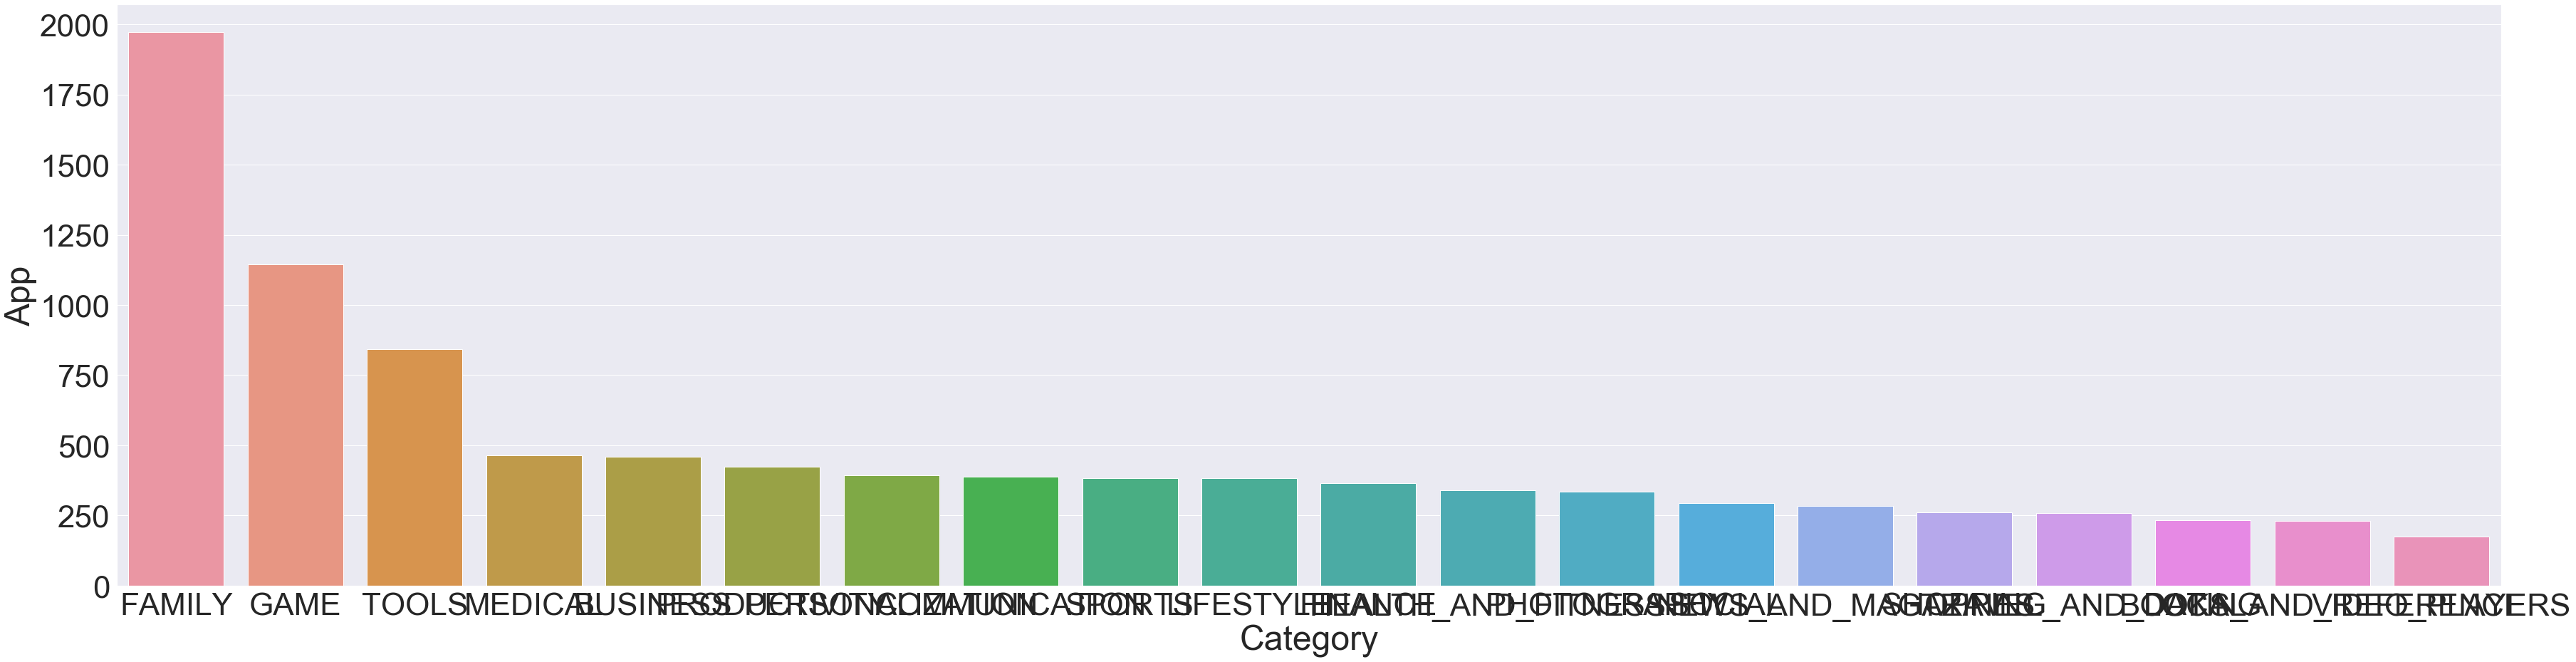

In [252]:
plt.figure(figsize=(60,15))
sns.set(font_scale=4) 
sns.barplot(x=category_top.index, y="App", data=category_top)
plt.show()

看哪一種分類rating最高

In [324]:
rating = df.groupby(["Category"])['Rating'].mean()
rating = pd.DataFrame(data=rating)
rating.sort_values(by = 'Rating', ascending = False, inplace = True)

In [335]:
# 找出前10個rating高的類型
rating_top = rating.head(10)
rating_top

,Rating
Category,
EVENTS,4.435556
EDUCATION,4.389032
ART_AND_DESIGN,4.358065
BOOKS_AND_REFERENCE,4.346067
PERSONALIZATION,4.335987
PARENTING,4.300000
GAME,4.286326
BEAUTY,4.278571
HEALTH_AND_FITNESS,4.277104


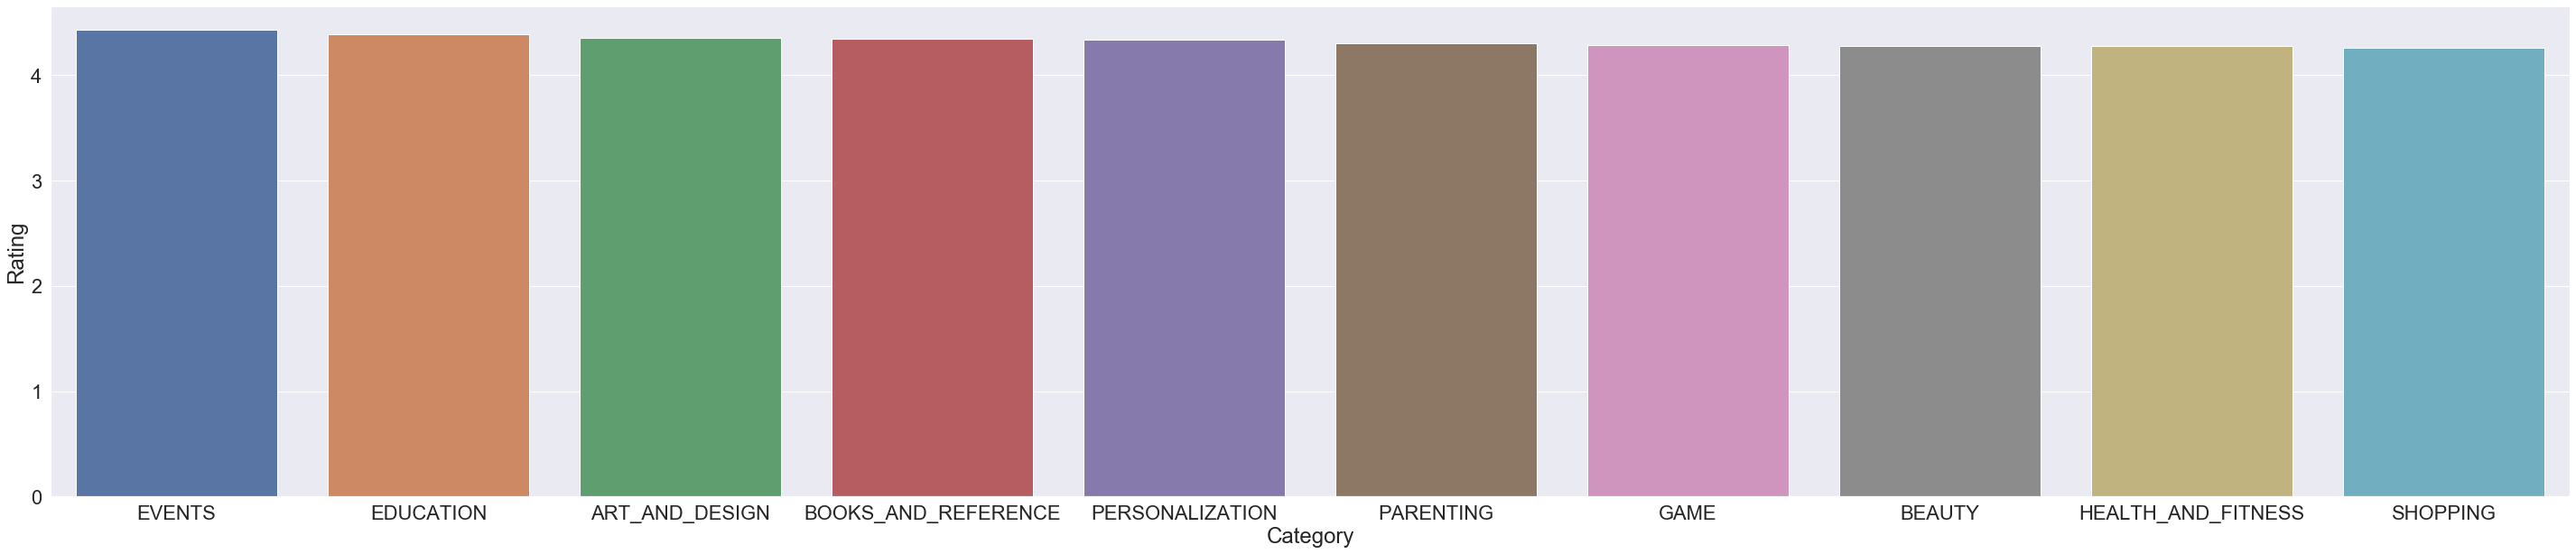

In [343]:
plt.figure(figsize=(50,10))
sns.set(font_scale=2) 
sns.barplot(x=rating_top.index, y="Rating", data=rating_top)
plt.show()